# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

#### Solution

1. n_estimators

Determines the amount of trees.

Too few trees and the model might resemble a single tree too much, and as such will be unstable and (more) inaccurate.

Too many trees might increase computational complexity and cost.

2. max_depth

Determines the max depth of each indidivual tree.

Too low and the model might be (more) inaccurate.

Setting it too might increase computational complexity & cost and the model might overfit.

3. max_features

Determines the amount of features in each tree.

Too low and the model might underfit.

Too high and the trees might resemble each other too much, inducing overfitting.

4. bootstrap

Determines whether bootstrapping should be used when selecting the sample for each tree.

No bootstrapping will make each tree use the whole dataset, and sensitivity to outliers is increased.

Bootstrapping will decrease sensitivity to outliers.



> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

#### Solution

Max features should be set to the amount of features (30 for this dataset) and bootstrapping should be set to False.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

The cell is rather long. For PCA scaled digits I utilize the manual implementation. Otherwise I cycle through the other possibilites, create an appropriate pipeline (or instance if no scaling) and plot them all at the end.

C:\Users\Malini\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


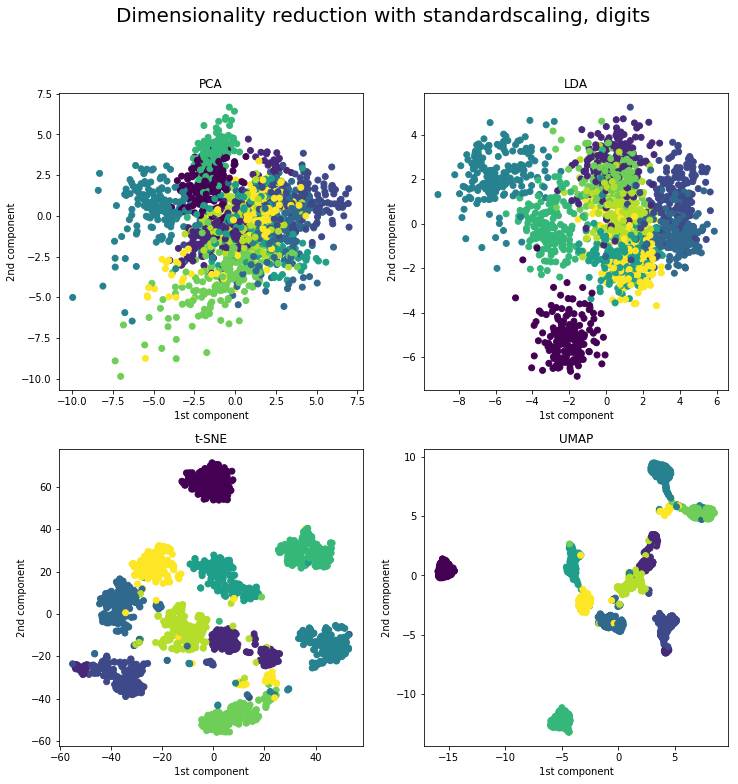

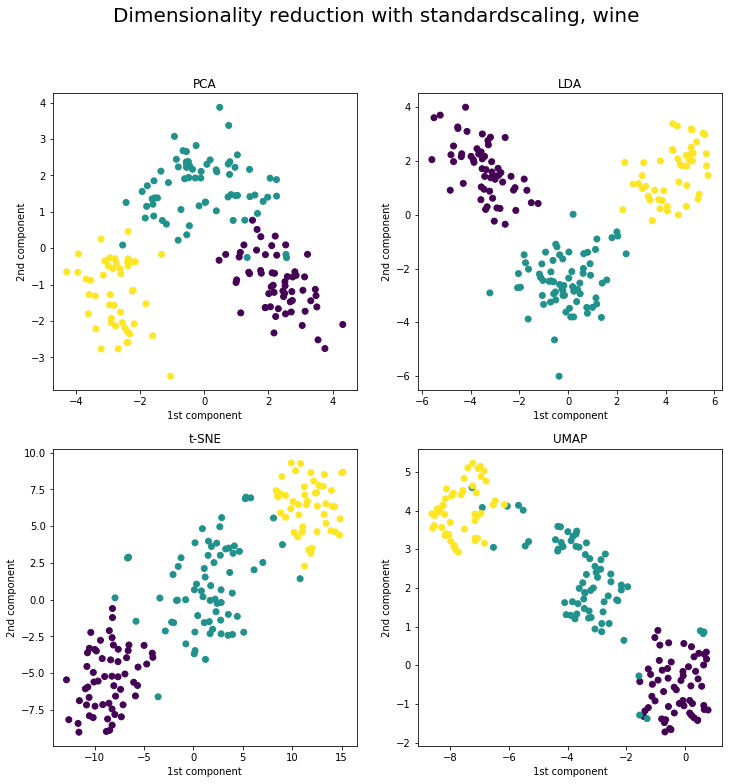

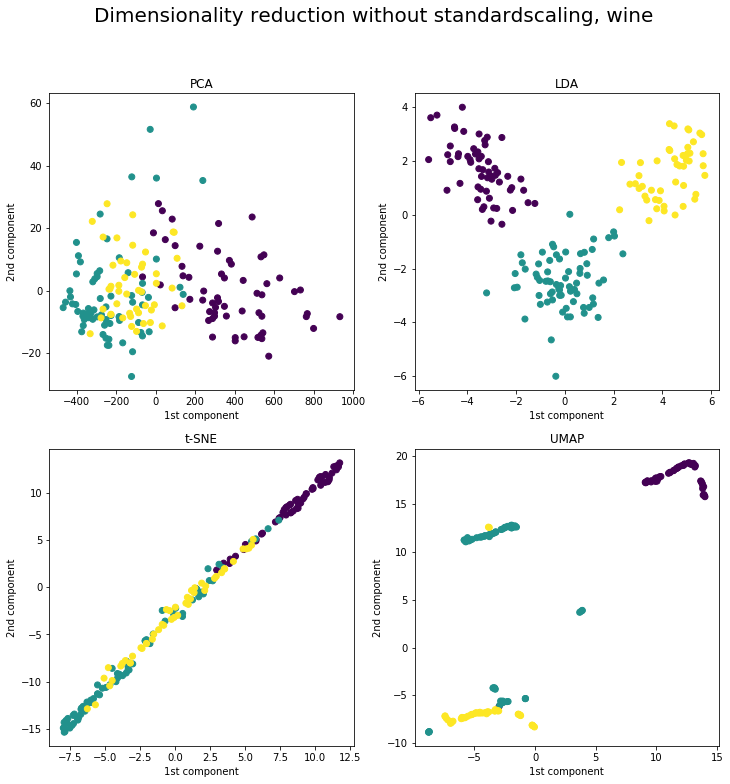

In [2]:
# Solution
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
import numpy as np

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

%matplotlib inline
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

# Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X_wine)

# Get covariance matrix
cov_mat = np.cov(X_std.T)

# Compute its eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Sort eigenvectors by eigenvalues in descending order
eigen_vals, eigen_vecs = zip(*sorted(
    zip(abs(eigen_vals), eigen_vecs.T),
    key=lambda kv: kv[0], reverse=True
))

# Get the top 2 eigenvectors
top_k_eigen_vecs = eigen_vecs[:2]

# Compose basis transformation matrix
W = np.hstack([
    w.reshape(-1, 1) for w in top_k_eigen_vecs
])

# Transform datapoints
Z = np.dot(X_std, W)

class cmap_in_categories:
    """Create map to range of colors inside given categories.
    Example
    -------
    >>> cmap = cmap_in_categories(['cats', 'dogs', 'squirrels'])
    >>> cmap('squirrels')
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_categories, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain_map = dict(list(zip(cmap_categories, list(range(len(cmap_categories))))))
        self.cmap_domain = [min(self.cmap_domain_map.values()), max(self.cmap_domain_map.values())]
        self.cmap_categories = cmap_categories
        self.cmap_range = cmap_range
        self.m = interp1d(self.cmap_domain, self.cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, category):
        if not category in self.cmap_categories:
            raise Exception("Category must be inside cmap_categories.")
        return self.cmap(self.m(self.cmap_domain_map[category]))
    
# PCA

# Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X_digits)

# Get covariance matrix
cov_mat = np.cov(X_std.T)

# Compute its eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Sort eigenvectors by eigenvalues in descending order
eigen_vals, eigen_vecs = zip(*sorted(
    zip(abs(eigen_vals), eigen_vecs.T),
    key=lambda kv: kv[0], reverse=True
))

# Get the top 2 eigenvectors
top_k_eigen_vecs = eigen_vecs[:2]

# Compose basis transformation matrix
W = np.hstack([
    w.reshape(-1, 1) for w in top_k_eigen_vecs
])

# Transform datapoints
Z = np.dot(X_std, W)

from sklearn.decomposition         import PCA
from sklearn.pipeline              import Pipeline

# create pipeline

PCA_pipeline = Pipeline(steps =   [ ('scaler'      , StandardScaler()),
                                    ('PCA'         , PCA())
                                  ]
                             )

# fit transform

PCA_X_wine = PCA_pipeline.fit_transform(X_wine, y_wine)

PCA_instance = PCA()

PCA_X_wine_no_scale = PCA_instance.fit_transform(X_wine, y_wine) 

# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# create pipeline

LDA_pipeline = Pipeline(steps =   [ ('scaler'      , StandardScaler()),
                                    ('LDA'         , LDA())
                                  ]
                             )

# fit transform

LDA_X_digits = LDA_pipeline.fit_transform(X_digits, y_digits)

LDA_X_wine = LDA_pipeline.fit_transform(X_wine, y_wine)

LDA_instance = LDA()

LDA_X_wine_no_scale = LDA_instance.fit_transform(X_wine, y_wine) 

# t-SNE

from sklearn.manifold import TSNE 

# create pipeline

TSNE_pipeline = Pipeline(steps =   [ ('scaler'      , StandardScaler()),
                                     ('TSNE'        , TSNE())
                                   ] 
                             )

# fit transform

TSNE_X_digits = TSNE_pipeline.fit_transform(X_digits)

TSNE_X_wine = TSNE_pipeline.fit_transform(X_wine)

TSNE_instance = TSNE()

TSNE_X_wine_no_scale = TSNE_instance.fit_transform(X_wine, y_wine) 

# UMAP

import umap

reducer = umap.UMAP(random_state = 73)

std_scaler = StandardScaler()

std_X = std_scaler.fit_transform(X_digits)

UMAP_X_digits = reducer.fit_transform(std_X)

reducer = umap.UMAP(random_state = 73)

std_scaler = StandardScaler()

std_X = std_scaler.fit_transform(X_wine)

UMAP_X_wine = reducer.fit_transform(std_X)

reducer = umap.UMAP(random_state = 73)

UMAP_X_wine_no_scale = reducer.fit_transform(X_wine, y_wine) 

# plot

plt.figure(figsize=(12, 12))

plt.suptitle('Dimensionality reduction with standardscaling, digits', fontsize=20)

plt.subplot(221)
plt.scatter(Z[:,0], Z[:,1], c=y_digits)
plt.title('PCA')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(222)
plt.scatter(LDA_X_digits[:,0], LDA_X_digits[:,1], c=y_digits)
plt.title('LDA')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(223)
plt.scatter(TSNE_X_digits[:,0], TSNE_X_digits[:,1], c=y_digits)
plt.title('t-SNE')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(224)
plt.scatter(UMAP_X_digits[:,0], UMAP_X_digits[:,1], c=y_digits)
plt.title('UMAP')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.show()

plt.figure(figsize=(12, 12))

plt.suptitle('Dimensionality reduction with standardscaling, wine', fontsize=20)

plt.subplot(221)
plt.scatter(PCA_X_wine[:,0], PCA_X_wine[:,1], c=y_wine)
plt.title('PCA')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(222)
plt.scatter(LDA_X_wine[:,0], LDA_X_wine[:,1], c=y_wine)
plt.title('LDA')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(223)
plt.scatter(TSNE_X_wine[:,0], TSNE_X_wine[:,1], c=y_wine)
plt.title('t-SNE')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(224)
plt.scatter(UMAP_X_wine[:,0], UMAP_X_wine[:,1], c=y_wine)
plt.title('UMAP')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.show()

plt.figure(figsize=(12, 12))

plt.suptitle('Dimensionality reduction without standardscaling, wine', fontsize=20)

plt.subplot(221)
plt.scatter(PCA_X_wine_no_scale[:,0], PCA_X_wine_no_scale[:,1], c=y_wine)
plt.title('PCA')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(222)
plt.scatter(LDA_X_wine_no_scale[:,0], LDA_X_wine_no_scale[:,1], c=y_wine)
plt.title('LDA')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(223)
plt.scatter(TSNE_X_wine_no_scale[:,0], TSNE_X_wine_no_scale[:,1], c=y_wine)
plt.title('t-SNE')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.subplot(224)
plt.scatter(UMAP_X_wine_no_scale[:,0], UMAP_X_wine_no_scale[:,1], c=y_wine)
plt.title('UMAP')
plt.xlabel("1st component")
plt.ylabel("2nd component")

plt.show()

2. If I do not standardize the wine dataset, some features vary a lot more than others, which results in worse performance, especially in PCA and t-SNE. This is not a problem with the digits, as all the pixels are greyscale encoded, and thus measured on the same scale.
3. It is seen that LDA perfectly separates the three groups using only two components in the wine dataset, whereas it is clearly outperformed by both t-SNE and UMAP in the digits dataset. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

#### Solution

A tree is honest if one partition of the data is used to match on covariates using a modified criteria penalizing small leafs and another partition is used to estimate local treatment effect. This prevent data leakage.